In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml-labs/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['bmi_age'] = df['bmi'] * df['age']
df['children_smoker'] = df['children'] * df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df['age_smoker'] = df['age'] * df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_age,children_smoker,age_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,530.100,0,19
1,18,male,33.770,1,no,southeast,1725.55230,607.860,0,0
2,28,male,33.000,3,no,southeast,4449.46200,924.000,0,0
3,33,male,22.705,0,no,northwest,21984.47061,749.265,0,0
4,32,male,28.880,0,no,northwest,3866.85520,924.160,0,0


In [ ]:
X = df.drop('charges', axis=1)
y = df['charges'].values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(sparse_output=False), categorical_features)
])

X_processed = preprocessor.fit_transform(X)
y = y.values.reshape(-1, 1)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
class RegressionNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = RegressionNet(X_train.shape[1])

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []

for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{1000}, Loss: {loss.item():.4f}")

Epoch 20/1000, Loss: 0.8141
Epoch 40/1000, Loss: 0.5447
Epoch 60/1000, Loss: 0.2775
Epoch 80/1000, Loss: 0.2023
Epoch 100/1000, Loss: 0.1682
Epoch 120/1000, Loss: 0.1522
Epoch 140/1000, Loss: 0.1448
Epoch 160/1000, Loss: 0.1403
Epoch 180/1000, Loss: 0.1370
Epoch 200/1000, Loss: 0.1343
Epoch 220/1000, Loss: 0.1319
Epoch 240/1000, Loss: 0.1297
Epoch 260/1000, Loss: 0.1278
Epoch 280/1000, Loss: 0.1261
Epoch 300/1000, Loss: 0.1245
Epoch 320/1000, Loss: 0.1229
Epoch 340/1000, Loss: 0.1212
Epoch 360/1000, Loss: 0.1195
Epoch 380/1000, Loss: 0.1179
Epoch 400/1000, Loss: 0.1163
Epoch 420/1000, Loss: 0.1148
Epoch 440/1000, Loss: 0.1133
Epoch 460/1000, Loss: 0.1119
Epoch 480/1000, Loss: 0.1105
Epoch 500/1000, Loss: 0.1091
Epoch 520/1000, Loss: 0.1076
Epoch 540/1000, Loss: 0.1061
Epoch 560/1000, Loss: 0.1047
Epoch 580/1000, Loss: 0.1034
Epoch 600/1000, Loss: 0.1020
Epoch 620/1000, Loss: 0.1007
Epoch 640/1000, Loss: 0.0995
Epoch 660/1000, Loss: 0.0982
Epoch 680/1000, Loss: 0.0971
Epoch 700/1000, Lo

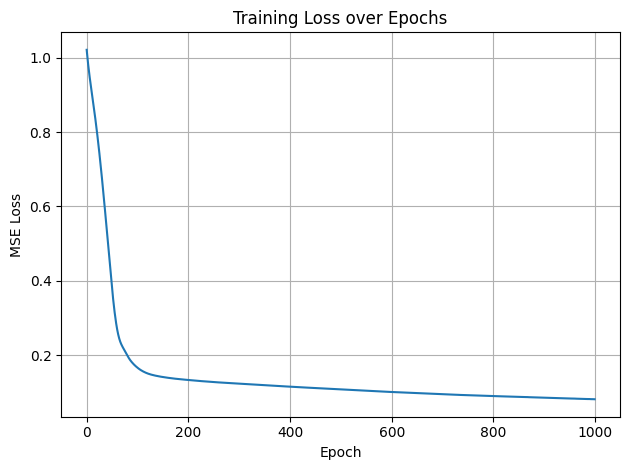

In [ ]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

y_pred_inv = scaler_y.inverse_transform(y_pred.numpy())
y_test_inv = scaler_y.inverse_transform(y_test.numpy())

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test_inv, y_pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)))
print("R²:", r2_score(y_test_inv, y_pred_inv))

MAE: 3038.87841796875
RMSE: 4944.05016155783
R²: 0.8425518274307251


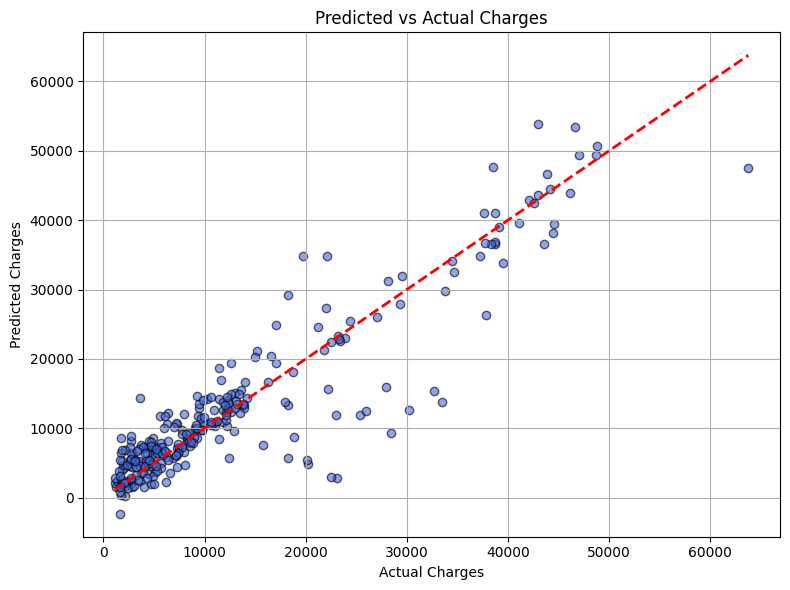

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.6, color='royalblue', edgecolors='k')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.grid(True)
plt.tight_layout()
plt.show()